In [2]:
import pandas as pd
url1 = 'https://raw.githubusercontent.com/QuantEcon/lecture-python/master/source/_static/lecture_specific/pandas_panel/realwage.csv'


In [9]:
# Display 6 columns for viewing purposes
#pd.set_option('display.max_columns', 6)

# Reduce decimal points to 2
pd.options.display.float_format = '{:,.2f}'.format

realwage = pd.read_csv(url1)
realwage.head()
# this is the "long format"

,Unnamed: 0,Time,Country,Series,Pay period,value
0,0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,132.44"
1,1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,100.92"
2,2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,747.41"
3,3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,580.14"
4,4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,755.83"


In [10]:
realwage = realwage.pivot_table(values='value',
                                index='Time',
                                columns=['Country', 'Series', 'Pay period'])
realwage.head()
# this is the "wide format"

Country                                   Australia         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                20,410.65  10.33   
2007-01-01                                21,087.57  10.67   
2008-01-01                                20,718.24  10.48   
2009-01-01                                20,984.77  10.62   
2010-01-01                                20,879.33  10.57   

Country                                                        ...  \
Series     In 2015 constant prices at 2015 USD exchange rates  ...   
Pay period                                             Annual  ...   
Time                                                           ...   
2006-01-01                                          23,826.64  ...   
2007-01-01                                          24,616.84  ...   
2008-01-01                                          24,185.70  ...   
2009-01-01                                          24,496.84  ...   
2010-01-01                                          24,373.76  ...   

Country                               United States  \
Series     In 2015 constant prices at 2015 USD PPPs   
Pay period                                   Hourly   
Time                                                  
2006-01-01                                     6.05   
2007-01-01                                     6.24   
2008-01-01                                     6.78   
2009-01-01                                     7.58   
2010-01-01                                     7.88   

Country                                                               
Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88  

[5 rows x 128 columns]

In [11]:
realwage.index = pd.to_datetime(realwage.index)
type(realwage.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [13]:
print(realwage.columns.names)

['Country', 'Series', 'Pay period']


In [14]:
realwage['United States'].head()

Series     In 2015 constant prices at 2015 USD PPPs         \
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                12,594.40   6.05   
2007-01-01                                12,974.40   6.24   
2008-01-01                                14,097.56   6.78   
2009-01-01                                15,756.42   7.58   
2010-01-01                                16,391.31   7.88   

Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88

In [19]:
realwage.stack(level='Country').head()

C:\Users\jin_x\AppData\Local\Temp\ipykernel_26324\1205496966.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  realwage.stack(level='Country').head()


Series               In 2015 constant prices at 2015 USD PPPs         \
Pay period                                             Annual Hourly   
Time       Country                                                     
2006-01-01 Australia                                20,410.65  10.33   
           Belgium                                  21,042.28  10.09   
           Brazil                                    3,310.51   1.41   
           Canada                                   13,649.69   6.56   
           Chile                                     5,201.65   2.22   

Series               In 2015 constant prices at 2015 USD exchange rates         
Pay period                                                       Annual Hourly  
Time       Country                                                              
2006-01-01 Australia                                          23,826.64  12.06  
           Belgium                                            20,228.74   9.70  
           Brazil                                              2,032.87   0.87  
           Canada                                             14,335.12   6.89  
           Chile                                               3,333.76   1.42

In [21]:
realwage.loc['2015'].stack(level=(1, 2)).head()  # .transpose().head()

C:\Users\jin_x\AppData\Local\Temp\ipykernel_26324\278216240.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  realwage.loc['2015'].stack(level=(1, 2)).head()  # .transpose().head()


Country                                                                   Australia  \
Time       Series                                             Pay period              
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual      21,715.53   
                                                              Hourly          10.99   
           In 2015 constant prices at 2015 USD exchange rates Annual      25,349.90   
                                                              Hourly          12.83   

Country                                                                    Belgium  \
Time       Series                                             Pay period             
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual     21,588.12   
                                                              Hourly         10.35   
           In 2015 constant prices at 2015 USD exchange rates Annual     20,753.48   
                                                              Hourly          9.95   

Country                                                                    Brazil  \
Time       Series                                             Pay period            
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual     4,628.63   
                                                              Hourly         2.00   
           In 2015 constant prices at 2015 USD exchange rates Annual     2,842.28   
                                                              Hourly         1.21   

Country                                                                   ...  \
Time       Series                                             Pay period  ...   
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual      ...   
                                                              Hourly      ...   
           In 2015 constant prices at 2015 USD exchange rates Annual      ...   
                                                              Hourly      ...   

Country                                                                     Turkey  \
Time       Series                                             Pay period             
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual     10,062.42   
                                                              Hourly          4.82   
           In 2015 constant prices at 2015 USD exchange rates Annual      5,618.36   
                                                              Hourly          2.69   

Country                                                                   United Kingdom  \
Time       Series                                             Pay period                   
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual           17,125.45   
                                                              Hourly                8.23   
           In 2015 constant prices at 2015 USD exchange rates Annual           20,814.46   
                                                              Hourly               10.01   

Country                                                                   United States  
Time       Series                                             Pay period                 
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual          15,080.00  
                                                              Hourly               7.25  
           In 2015 constant prices at 2015 USD exchange rates Annual          15,080.00  
                                                              Hourly               7.25  

[4 rows x 32 columns]

In [22]:
realwage.loc['2015'].stack(level=(1, 2)).head().transpose().head()

C:\Users\jin_x\AppData\Local\Temp\ipykernel_26324\2878500831.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  realwage.loc['2015'].stack(level=(1, 2)).head().transpose().head()


Time                                     2015-01-01         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Country                                                      
Australia                                 21,715.53  10.99   
Belgium                                   21,588.12  10.35   
Brazil                                     4,628.63   2.00   
Canada                                    16,536.83   7.95   
Chile                                      6,633.56   2.80   

Time                                                                  
Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Country                                                               
Australia                                           25,349.90  12.83  
Belgium                                             20,753.48   9.95  
Brazil                                               2,842.28   1.21  
Canada                                              17,367.24   8.35  
Chile                                                4,251.49   1.81

In [23]:
realwage_f = realwage.xs(('Hourly', 'In 2015 constant prices at 2015 USD exchange rates'),
                         level=('Pay period', 'Series'), axis=1)
realwage_f.head()

Country,Australia,Belgium,Brazil,...,Turkey,United Kingdom,United States
Time,,,,,,,
2006-01-01,12.06,9.70,0.87,...,2.27,9.81,6.05
2007-01-01,12.46,9.82,0.92,...,2.26,10.07,6.24
2008-01-01,12.24,9.87,0.96,...,2.22,10.04,6.78
2009-01-01,12.40,10.21,1.03,...,2.28,10.15,7.58
2010-01-01,12.34,10.05,1.08,...,2.30,9.96,7.88


In [24]:
url2 = 'https://raw.githubusercontent.com/QuantEcon/lecture-python/master/source/_static/lecture_specific/pandas_panel/countries.csv'
worlddata = pd.read_csv(url2, sep=';')
worlddata.head()

,Country (en),Country (de),Country (local),...,Deathrate,Life expectancy,Url
0,Afghanistan,Afghanistan,Afganistan/Afqanestan,...,13.70,51.30,https://www.laenderdaten.info/Asien/Afghanista...
1,Egypt,Ägypten,Misr,...,4.70,72.70,https://www.laenderdaten.info/Afrika/Aegypten/...
2,Åland Islands,Ålandinseln,Åland,...,0.00,0.00,https://www.laenderdaten.info/Europa/Aland/ind...
3,Albania,Albanien,Shqipëria,...,6.70,78.30,https://www.laenderdaten.info/Europa/Albanien/...
4,Algeria,Algerien,Al-Jaza’ir/Algérie,...,4.30,76.80,https://www.laenderdaten.info/Afrika/Algerien/...


In [25]:
worlddata = worlddata[['Country (en)', 'Continent']]
worlddata = worlddata.rename(columns={'Country (en)': 'Country'})
worlddata.head()

,Country,Continent
0,Afghanistan,Asia
1,Egypt,Africa
2,Åland Islands,Europe
3,Albania,Europe
4,Algeria,Africa


In [26]:
merged = pd.merge(realwage_f.transpose(), worlddata,
                  how='left', left_index=True, right_on='Country')
merged.head()

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
17.00,12.06,12.46,12.24,...,12.98,Australia,Australia
23.00,9.70,9.82,9.87,...,9.76,Belgium,Europe
32.00,0.87,0.92,0.96,...,1.24,Brazil,South America
100.00,6.89,6.96,7.24,...,8.48,Canada,North America
38.00,1.42,1.45,1.44,...,1.91,Chile,South America


In [30]:
missing_continents = {'Korea': 'Asia',
                      'Russian Federation': 'Europe',
                      'Slovak Republic': 'Europe'}

In [31]:
merged['Continent'] = merged['Continent'].fillna(merged['Country'].map(missing_continents))

# Check for whether continents were correctly mapped

merged[merged['Country'] == 'Korea']

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
NaN,3.42,3.74,3.87,...,5.28,Korea,Asia


In [29]:
replace = ['Central America', 'North America', 'South America']

for country in replace:
    merged['Continent'].replace(to_replace=country,
                                value='America',
                                inplace=True)

C:\Users\jin_x\AppData\Local\Temp\ipykernel_26324\2897028784.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged['Continent'].replace(to_replace=country,


In [32]:
merged = merged.set_index(['Continent', 'Country']).sort_index()
merged.head()

2006-01-01  2007-01-01  2008-01-01  ...  2014-01-01  \
Continent Country                                         ...               
America   Brazil            0.87        0.92        0.96  ...        1.21   
          Canada            6.89        6.96        7.24  ...        8.22   
          Chile             1.42        1.45        1.44  ...        1.76   
          Colombia          1.01        1.02        1.01  ...        1.13   
          Costa Rica         NaN         NaN         NaN  ...        2.41   

                      2015-01-01  2016-01-01  
Continent Country                             
America   Brazil            1.21        1.24  
          Canada            8.35        8.48  
          Chile             1.81        1.91  
          Colombia          1.13        1.12  
          Costa Rica        2.56        2.63  

[5 rows x 11 columns]

In [33]:
merged.columns = pd.to_datetime(merged.columns)
merged.columns = merged.columns.rename('Time')
merged.columns

DatetimeIndex(['2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='Time', freq=None)

In [34]:
merged = merged.transpose()
merged.head()

Continent  America               ...   Europe                     
Country     Brazil Canada Chile  ... Slovenia Spain United Kingdom
Time                             ...                              
2006-01-01    0.87   6.89  1.42  ...     3.92  3.99           9.81
2007-01-01    0.92   6.96  1.45  ...     3.88  4.10          10.07
2008-01-01    0.96   7.24  1.44  ...     3.96  4.14          10.04
2009-01-01    1.03   7.67  1.52  ...     4.08  4.32          10.15
2010-01-01    1.08   7.94  1.56  ...     4.81  4.30           9.96

[5 rows x 32 columns]

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

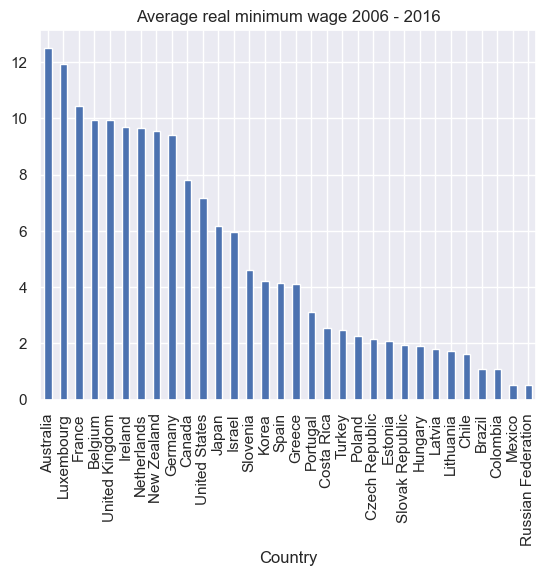

In [36]:
merged.mean().sort_values(ascending=False).plot(kind='bar',
                                                title="Average real minimum wage 2006 - 2016")

# Set country labels
country_labels = merged.mean().sort_values(ascending=False).index.get_level_values('Country').tolist()
plt.xticks(range(0, len(country_labels)), country_labels)
plt.xlabel('Country')

plt.show()

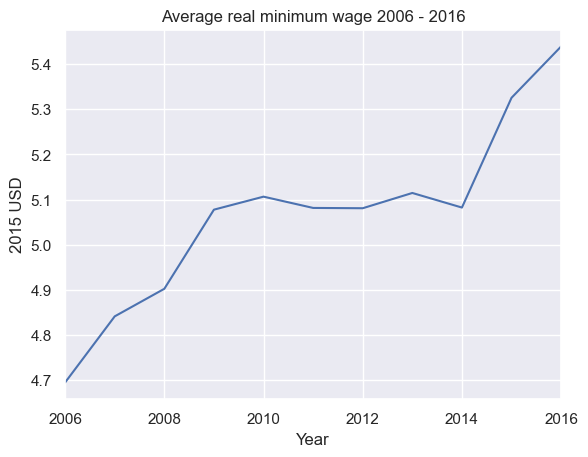

In [37]:
merged.mean(axis=1).plot()
plt.title('Average real minimum wage 2006 - 2016')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

C:\Users\jin_x\AppData\Local\Temp\ipykernel_26324\3178377022.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  merged.groupby(level='Continent', axis=1).mean().plot()


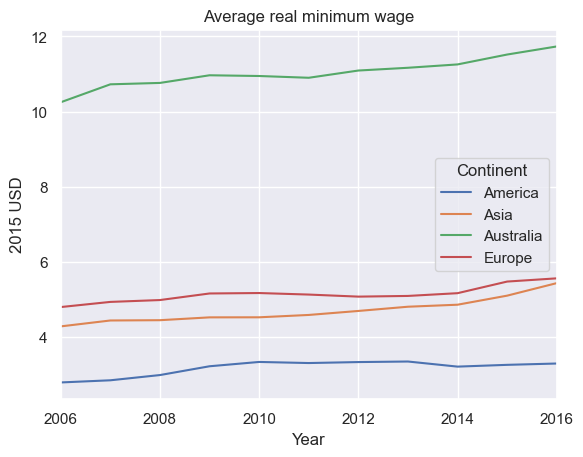

In [38]:
merged.groupby(level='Continent', axis=1).mean().plot()
plt.title('Average real minimum wage')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

C:\Users\jin_x\AppData\Local\Temp\ipykernel_26324\1828148450.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  merged.groupby(level='Continent', axis=1).mean().plot()


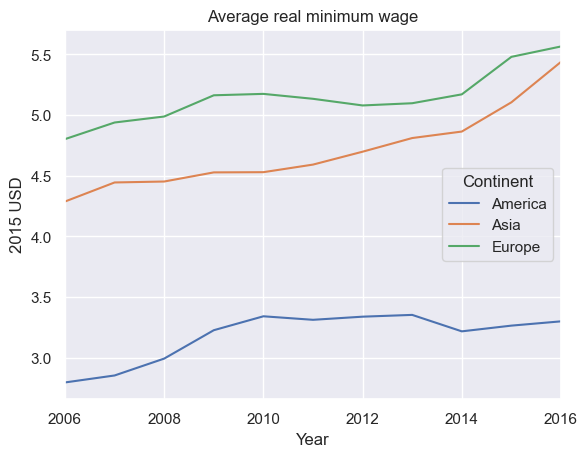

In [39]:
merged = merged.drop('Australia', level='Continent', axis=1)
merged.groupby(level='Continent', axis=1).mean().plot()
plt.title('Average real minimum wage')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

In [42]:
merged.stack().describe()

C:\Users\jin_x\AppData\Local\Temp\ipykernel_26324\4288984536.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  merged.stack().describe()


Continent,America,Asia,Europe
count,69.00,44.00,200.00
mean,3.19,4.70,5.15
std,3.02,1.56,3.82
min,0.52,2.22,0.23
25%,1.03,3.37,2.02
50%,1.44,5.48,3.54
75%,6.96,5.95,9.70
max,8.48,6.65,12.39


C:\Users\jin_x\AppData\Local\Temp\ipykernel_26324\3625304140.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  grouped = merged.groupby(level='Continent', axis=1)


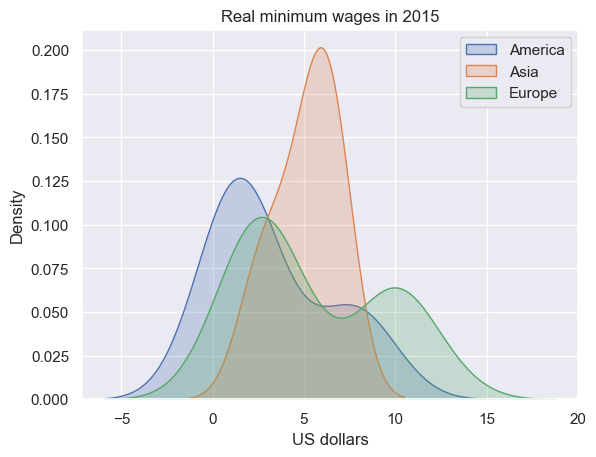

In [44]:
grouped = merged.groupby(level='Continent', axis=1)
continents = grouped.groups.keys()

for continent in continents:
    sns.kdeplot(grouped.get_group(continent).loc['2015'].unstack(), label=continent, fill=True)

plt.title('Real minimum wages in 2015')
plt.xlabel('US dollars')
plt.legend()
plt.show()